# Genetic Algorithm for OneMax Problem

## Imports and Constants

In [13]:
import random
import matplotlib.pyplot as plt

ONE_MAX_LENGTH = 100  # length of the OneMax problem

POPULATION_SIZE = 200  # number of individuals in population
P_CROSSOVER = 0.9  # probability of crossover between two individuals
P_MUTATION = 0.1  # probability of mutation of an individual
MAX_GENERATIONS = 50  # max amount of generations

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

## Implementation

In [14]:
class FitnessMax():
    def __init__(self):
        self.values = [0]


class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()


def oneMaxFitness(individual):
    return sum(individual),


def individualCreator():
    return Individual([random.randint(0, 1) for i in range(ONE_MAX_LENGTH)])


def populationCreator(n=0):
    return list([individualCreator() for i in range(n)])


population = populationCreator(n=POPULATION_SIZE)
generationCounter = 0

fitnessValues = list(map(oneMaxFitness, population))

for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

maxFitnessValues = []
meanFitnessValues = []


def clone(value):
    ind = Individual(value[:])
    ind.fitness.values[0] = value.fitness.values[0]
    return ind


def selTournament(population, p_len):
    offspring = []
    for n in range(p_len):
        i1 = i2 = i3 = 0
        while i1 == i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = random.randint(0, p_len - 1), random.randint(0, p_len - 1), random.randint(0, p_len - 1)

        offspring.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values[0]))

    return offspring


def cxOnePoint(child1, child2):
    s = random.randint(2, len(child1) - 3)
    child1[s:], child2[s:] = child2[s:], child1[s:]


def mutFlipBit(mutant, indpb=0.01):
    for indx in range(len(mutant)):
        if random.random() < indpb:
            mutant[indx] = 0 if mutant[indx] == 1 else 1

## Evolution

Generation 1: Max fitness = 63, Mean fitness = 53.53
Best individual =  1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 

Generation 2: Max fitness = 66, Mean fitness = 56.625
Best individual =  1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 

Generation 3: Max fitness = 67, Mean fitness = 59.245
Best individual =  0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 

Generation 4: Max fitness = 70, Mean fitness = 61.97
Best individual =  1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 

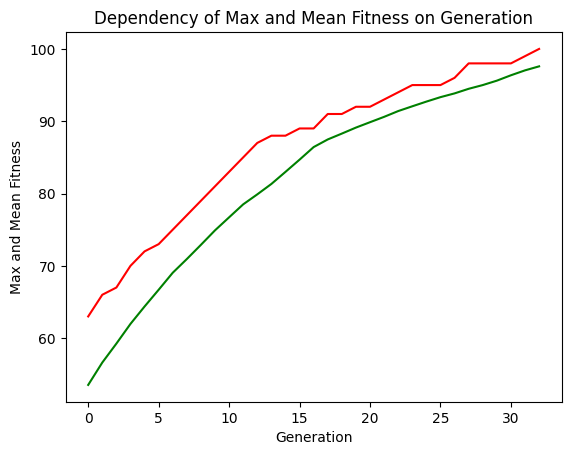

In [15]:
fitnessValues = [individual.fitness.values[0] for individual in population]

while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population))
    offspring = list(map(clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            cxOnePoint(child1, child2)

    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutFlipBit(mutant, indpb=1.0 / ONE_MAX_LENGTH)

    freshFitnessValues = list(map(oneMaxFitness, offspring))
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue

    population[:] = offspring

    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print(f"Generation {generationCounter}: Max fitness = {maxFitness}, Mean fitness = {meanFitness}")

    best_index = fitnessValues.index(max(fitnessValues))
    print("Best individual = ", *population[best_index], "\n")

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max and Mean Fitness')
plt.title('Dependency of Max and Mean Fitness on Generation')
plt.show()